# Deanna's Exploration of the Data

In [2]:
import pandas as pd
import numpy as np
import sqlite3

In [21]:
movieGross = pd.read_csv('cleanedData/movieGrossClean.csv', index_col = 0)
tmdbMovies = pd.read_csv('cleanedData/tmdbMoviesClean.csv', index_col = 0)
movieBudgets = pd.read_csv('cleanedData/movieBudgets.csv',index_col = 0)
movieInfo = pd.read_csv('cleanedData/movieInfoClean.csv', index_col = 0)
reviews = pd.read_csv('cleanedData/reviewsClean.csv', index_col=0)
# Connect to sql database
conn = sqlite3.connect('data/im.db')

### Taking Preliminary Look at the Data

In [28]:
movieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,Inception,WB,292600000,535700000,2010-01-01
4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [29]:
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"['Adventure', 'Fantasy', 'Family']",...,0,0,0,0,0,0,0,0,0,0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"['Fantasy', 'Adventure', 'Animation', 'Family']",...,0,0,0,0,0,0,0,0,0,0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"['Adventure', 'Action', 'Science Fiction']",...,0,0,0,0,0,1,0,0,0,0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"['Animation', 'Comedy', 'Family']",...,0,0,0,0,0,0,0,0,0,0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"['Action', 'Science Fiction', 'Adventure']",...,0,0,0,0,0,1,0,0,0,0


In [30]:
tmdbMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
 9   genres             26517 non-null  object 
 10  Action             26517 non-null  int64  
 11  Adventure          26517 non-null  int64  
 12  Animation          26517 non-null  int64  
 13  Comedy             26517 non-null  int64  
 14  Crime              26517 non-null  int64  
 15  Documentary        26517 non-null  int64  
 16  Drama              265

In [31]:
movieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [32]:
movieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


In [33]:
movieInfo.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [34]:
movieInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      1556 non-null   object 
 1   rating        1556 non-null   object 
 2   genre         1556 non-null   object 
 3   director      1556 non-null   object 
 4   writer        1556 non-null   object 
 5   theater_date  1556 non-null   object 
 6   dvd_date      1556 non-null   object 
 7   currency      1556 non-null   object 
 8   box_office    1556 non-null   float64
 9   runtime       1556 non-null   int64  
 10  studio        1556 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 145.9+ KB


In [35]:
reviews.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [36]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      1556 non-null   object 
 1   rating        1556 non-null   object 
 2   genre         1556 non-null   object 
 3   director      1556 non-null   object 
 4   writer        1556 non-null   object 
 5   theater_date  1556 non-null   object 
 6   dvd_date      1556 non-null   object 
 7   currency      1556 non-null   object 
 8   box_office    1556 non-null   float64
 9   runtime       1556 non-null   int64  
 10  studio        1556 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 145.9+ KB


### Finding Top 50 Profitable Movies in MovieInfo

In [54]:
# Convert genre_ids into list
#library with function for us to complete this operation
import ast
#converts all strings into a list
movieInfo.genre = movieInfo.genre.map(lambda x: ast.literal_eval(x))

In [55]:
# copy dataframe for safety and ease
mi = movieInfo.copy()

In [56]:
# make sub dataframe uf the top 50 movies
top_mi = mi.sort_values(by=['box_office'],ascending=False)[0:50]
top_mi

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,[Drama],Mel Gibson,Mel Gibson|Benedict Fitzgerald,2004-02-25 00:00:00,2004-08-31 00:00:00,$,368000000.0,127,Newmarket Film Group
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,"[Action, Adventure, Science Fiction, Fantasy]",Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,2012-12-14 00:00:00,2013-03-19 00:00:00,$,303001229.0,170,Warner Bros.
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,"[Action, Adventure, Mystery]",Sam Mendes,John Logan|Robert Wade|Neal Purvis,2012-11-09 00:00:00,2013-03-11 00:00:00,$,299300000.0,145,MGM
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,[Comedy],Jay Roach,Jim Herzfeld|John Hamburg,2004-12-22 00:00:00,2005-04-26 00:00:00,$,279167575.0,118,Universal Pictures
1442,Youthful wizard Harry Potter returns to the sc...,PG,"[Family, Science Fiction, Fantasy]",Chris Columbus,Steve Kloves,2002-11-15 00:00:00,2003-04-11 00:00:00,$,261835892.0,161,Warner Bros. Pictures
1255,Mission: Impossible III director and Alias cre...,PG-13,"[Action, Adventure, Drama, Science Fiction, Fa...",-,Gene Roddenberry|Alex Kurtzman|Roberto Orci,2009-05-07 00:00:00,2009-11-17 00:00:00,$,257704099.0,127,IMAX
661,One woman's rocky road to the altar gets playe...,PG,"[Comedy, Romance]",Joel Zwick,Nia Vardalos,2002-04-19 00:00:00,2003-02-11 00:00:00,$,241250669.0,95,IFC Films
841,This is a contemporary retelling of H.G. Wells...,PG-13,"[Action, Adventure, Science Fiction, Fantasy]",Steven Spielberg,Josh Friedman|David Koepp,2005-06-29 00:00:00,2005-11-22 00:00:00,$,234141872.0,117,Paramount Pictures
1877,A hard-drinking lush finds himself thrust into...,PG-13,"[Action, Adventure, Comedy, Drama]",Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,2008-06-16 00:00:00,2008-11-25 00:00:00,$,227946274.0,92,Columbia Pictures


Identifying top genres

In [62]:
# make list of top genres
top_genres=[]
for genres in top_mi['genre']:
    top_genres += genres
genre_freq = {}
for g in top_genres:
    if g not in genre_freq.keys():
        genre_freq[g] = 1
    else:
        genre_freq[g] += 1
genre_freq

{'Drama': 20,
 'Action': 19,
 'Adventure': 19,
 'Science Fiction': 11,
 'Fantasy': 11,
 'Mystery': 12,
 'Comedy': 25,
 'Family': 7,
 'Romance': 11,
 'Horror': 1,
 'Animation': 6}

Identifying common words in synopsis

In [91]:
# importing Natural Language Toolkit for tokenization
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhedges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhedges\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
# making list of words in the synopses of top 50 movies
top_corpus = []
for i in range(50):
    top_corpus += word_tokenize(top_mi['synopsis'].iloc[i])
    
# excluding common stop words and punctuation
stops = stopwords.words('english')
punctuation = """!@#$%^&*()_+-={}[]:;"'<>?,./"""
words_to_cut = ["'s",'--',"'nt","'snt","''","``","n't","c","also"]
top_corpus = [x.lower() for x in top_corpus if x.lower() not in stops and x not in punctuation and x not in words_to_cut]

# making frequency distribution as a dict, then a pandas Series
corp_freq = {}
for word in top_corpus:
    if word not in corp_freq.keys():
        corp_freq[word] = 1
    else:
        corp_freq[word] += 1
frequencies = pd.Series(corp_freq)
chart_freq = frequencies.sort_values(ascending = False)[:20]
chart_freq

one         29
new         18
life        18
film        17
family      13
world       13
bourne      13
get         12
first       12
man         12
finds       11
comedy      11
job         10
back        10
find        10
soon        10
toula        9
help         9
princess     9
woman        9
dtype: int64

Charting Findings

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('seaborn-colorblind')
plt.rc('axes',titlesize = 24)
plt.rc('axes',labelsize = 24)

<AxesSubplot:title={'center':'Most Common Words in Top 50 Movie Descriptions'}, xlabel='Words', ylabel='Frequency'>

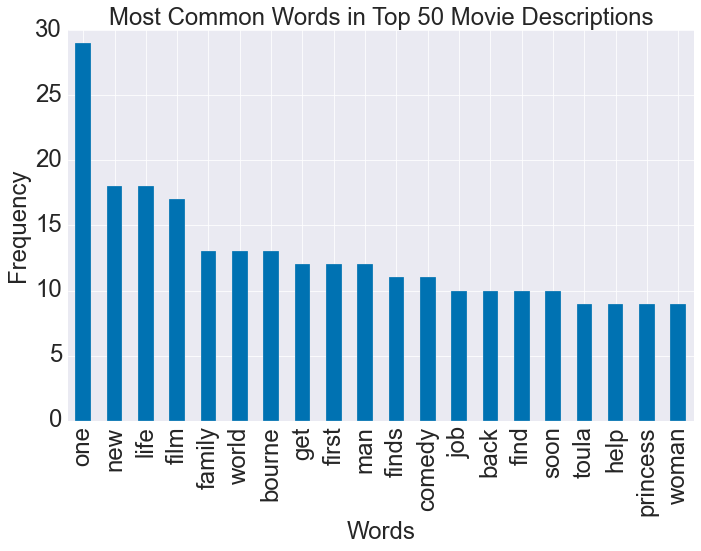

In [174]:
chart_freq.plot(kind = 'bar', title = 'Most Common Words in Top 50 Movie Descriptions',xlabel="Words",ylabel='Frequency',fontsize=24)